In [2]:
# Dependencies and Setup
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
#from scipy.stats import linregress
#import numpy as np

# Read in data
df = pd.read_csv('data_cleaned.csv')
df.head()

,Patient_ID,Appointment_ID,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,...,Scheduled_Day_Date,Scheduled_Hour,Scheduled_Day_of_Week,Scheduled_Month,Appointment_Day_Date,Appointment_Day_of_Week,Appointment_Month,Days_Between,lat,lon
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,...,2016-04-29,18,Friday,4,2016-04-29,Friday,4,0,-23.514826,-46.552112
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,...,2016-04-29,16,Friday,4,2016-04-29,Friday,4,0,-23.514826,-46.552112
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,...,2016-04-29,16,Friday,4,2016-04-29,Friday,4,0,-22.788662,-43.079799
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,...,2016-04-29,17,Friday,4,2016-04-29,Friday,4,0,-23.354233,-44.725856
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,...,2016-04-29,16,Friday,4,2016-04-29,Friday,4,0,-23.514826,-46.552112


In [3]:
#Verify the columns are showing properly
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110526 entries, 0 to 110525
Data columns (total 25 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Patient_ID               110526 non-null  float64
 1   Appointment_ID           110526 non-null  int64  
 2   Gender                   110526 non-null  object 
 3   Scheduled_Day            110526 non-null  object 
 4   Appointment_Day          110526 non-null  object 
 5   Age                      110526 non-null  int64  
 6   Neighbourhood            110526 non-null  object 
 7   Scholarship              110526 non-null  int64  
 8   Hypertension             110526 non-null  int64  
 9   Diabetes                 110526 non-null  int64  
 10  Alcoholism               110526 non-null  int64  
 11  Handicap                 110526 non-null  int64  
 12  SMS_Received             110526 non-null  int64  
 13  No_Show                  110526 non-null  object 
 14  No_S

In [4]:
#Count the number of patients who received SMS messages
#count_0 = no SMS Received
#count_1 = SMS Received
count_0 = (df['SMS_Received'] == 0).sum()
count_1 = (df['SMS_Received'] == 1).sum()

#Print the values of each
print("Count of 0:", count_0)
print("Count of 1:", count_1)

Count of 0: 75044
Count of 1: 35482


In [5]:
#Create a DataFrame called 'SMS_Summary' 
sms_summary = df.groupby(['SMS_Received', 'No_Show'])['Appointment_ID'].count()
sms_summary

SMS_Received  No_Show
0             No         62509
              Yes        12535
1             No         25698
              Yes         9784
Name: Appointment_ID, dtype: int64

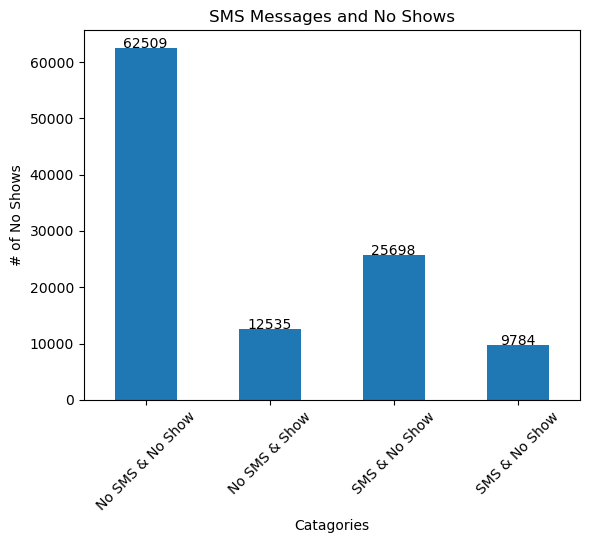

In [6]:
#Creating a Bar Graph to show the totals for each of these values
#Customizing x-axis labels
custom_ticks_x = [0,1,2,3]
custom_labels_x = ['No SMS & No Show', 'No SMS & Show', 'SMS & No Show', 'SMS & No Show']

#Customize the bar graph
sms_summary.plot.bar(title='SMS Messages and No Shows',
                     ylabel='# of No Shows',
                     xlabel='Catagories')
plt.xticks(custom_ticks_x, custom_labels_x, rotation=45)

#Annotate the number on top of each bar
for i, v in enumerate(sms_summary):
    plt.text(i, v + 0.1, str(v), ha='center')
    
#Display the graph
plt.show()


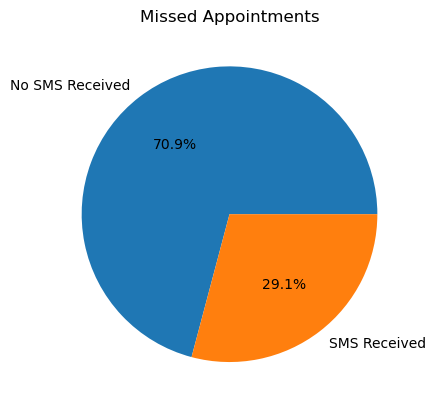

In [7]:
#Pie chart of Missed Appointments
labels = ['No SMS Received', 'SMS Received']

no_show = [62509, 25698]
total_no_show = sum(no_show)

plt.pie(no_show, labels=labels, autopct='%1.1f%%')
plt.title('Missed Appointments')
plt.show()


TypeError: 'str' object is not callable

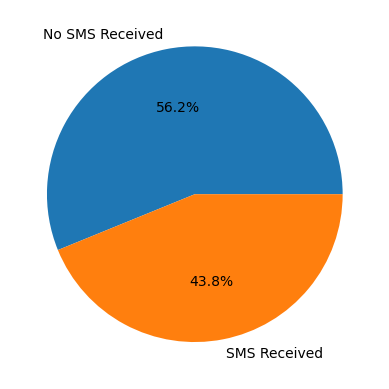

In [13]:
#Pie chart of Attended appointments
labels = ['No SMS Received', 'SMS Received']

show = [12535, 9784]
total_show = sum(show)

plt.pie(show, labels=labels, autopct='%1.1f%%')
plt.title('Attended Appointments')
plt.show()

In [9]:
#Check for multiple appointments for patients
patient_count = df["Patient_ID"].nunique()
appointment_count = df["Appointment_ID"].nunique()

print(patient_count)
print(appointment_count)

62298
110526


In [10]:
patient_summary = df.groupby(['Patient_ID'])['Appointment_ID'].count().reset_index(name='#_of_Visits')
print(patient_summary)

visit_summary = patient_summary.groupby(['#_of_Visits'])['Patient_ID'].count().reset_index(name='Patient_count')
visit_summary


         Patient_ID  #_of_Visits
0      3.921784e+04            1
1      4.374176e+04            1
2      9.377953e+04            1
3      1.417242e+05            1
4      5.376153e+05            1
...             ...          ...
62293  9.999320e+14            5
62294  9.999350e+14            1
62295  9.999465e+14            1
62296  9.999686e+14            1
62297  9.999816e+14            1

[62298 rows x 2 columns]


,#_of_Visits,Patient_count
0,1,37919
1,2,13895
2,3,5500
3,4,2367
4,5,1119
5,6,553
6,7,306
7,8,202
8,9,104
9,10,85
